<a href="https://colab.research.google.com/github/DatDoc/CS114.K21.KHTN/blob/master/sentiment_analysis/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHÂN TÍCH CẢM XÚC (SENTIMENT ANALYSIS)


## **Giới thiệu**

### 1.1 Đặt vấn đề
Với sự phát triển của các trang buôn bán điện tử ngày nay thì việc thu thập đánh giá từ các bình luận của người dùng là rất cần thiết. Các bình luận của người dùng giúp cho các trang web dễ dàng lọc, đề xuất các mặt hàng, địa điểm phù hợp với từng người dùng và đánh giá chất lượng dịch vụ của các đối tác. Với hàng chục nghìn cho tới hàng trăm nghìn bình luận mỗi ngày hiện nay thì việc phân loại (tốt, xấu) cho các bình luận từ người dùng không phải là điều dễ dàng cần đòi hỏi rất nhiều nhân lực. Cùng sự phát triển của AI, hiện nay chúng ta có thể giải quyết bài toán này bằng các thuật toán và mô hình học sâu với độ chính xác cao tương đương với con người

![picture](https://drive.google.com/uc?export=view&id=1M8Dzn2B3UsnrmCutB_w-u3JSfMJv5ytn)


### 1.2 Bài toán cụ thể


- Trong assignment này, chúng ta tiếp cận bài toán phân tích cảm xúc (Sentiment Analysis) thông qua tập dữ liệu chứa các bình luận được crawl trực tiếp từ foody. Nếu nhìn theo kiểu black box, đầu vào của bài toán là một câu hoặc đoạn văn bản và đầu ra là trạng thái tích cực, tiêu cực hay trung hoà (positive - negative - neutral). Trong phạm vi của assignment này, chúng ta chỉ quan tâm đến hai trạng thái cảm xúc là positive và negative.

![caption](https://drive.google.com/uc?export=view&id=1cg-W4IXMKP9jfpCcADKXqXwpgEV19I-f)

- Dataset chứa hơn 61.870 bình luận và điểm đánh giá của mỗi bình luận đó trên thang điểm từ 0.0 đến 10.0. Download bộ dữ liệu tại https://github.com/DatDoc/CS114.K21.KHTN/tree/master/sentiment_analysis


- Để bộ dữ liệu phù hợp với bài toán là đánh giá cảm xúc tiêu cực hay tích cực, nên trong bước tiền xử lý dữ liệu, các bình luận được đánh giá >= 8.0 thì sẽ được gán nhãn tích cực (1), các bình luận được đánh giá <= 5.0 thì được gán nhãn tiêu cực (0). Do đó số lượng bình luận trong bộ dữ liệu sẽ bị giảm xuống còn 34.985 bình luận bao gồm 8366 bình luận tiêu cực và 26619 bình luận tích cực.

- Các bước thực hiện bao gồm:

>1.   Tiền xử lý dữ liệu (preprocessing)
2.   Đúc trích đặc trưng (Feature Engineering)
3.   Lựa chọn thuật toán máy học
4.   Cài đặt, tinh chỉnh tham số
5.   Đánh giá kết quả, kết luận






 




## Xây dựng kế hoạch giải quyết bài toán

#### 2.1 Phân tích bài toán dưới góc nhìn Word Vectors

Nếu như chúng ta giữ nguyên định dạng đầu vào là chuỗi ký tự thì rất khó để thực hiện các thao tác biến đổi như tích vô hướng (dot product) hoặc các thuật toán trên mạng neural network như backpropagation. Thay vì dữ liệu đầu vào là một chuỗi, chúng ta cần chuyển đổi các từ trong tập từ điển sang dạng vector số học trong đó có thể thực hiện được các phép toán nêu trên.

![Word2Vec](https://drive.google.com/uc?export=view&id=12xKP6pFzDzj-0ToZX-27RjOhRcMFrfeb)

Trong hình minh hoạ ở trên, ta có thể hình dung dữ liệu đầu vào của thuật toán phân tích cảm xúc là một ma trận 16 x D chiều. Trong đó 16 là số lượng từ trong câu và D là số chiều của không gian vector để biểu diễn từ. Để ánh xạ từ một từ sang một vector, chúng ta sử dụng ma trận word embedding như đã thực hiện.

####2.2 Phân tích bài toán dưới góc nhìn TF IDF

TF-IDF (Term Frequency – Inverse Document Frequency) là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu. Một vài biến thể của tf-idf thường được sử dụng trong các hệ thống tìm kiếm như một công cụ chính để đánh giá và sắp xếp văn bản dựa vào truy vấn của người dùng.  Tf-idf cũng được sử dụng để lọc những từ stopwords trong các bài toán như tóm tắt văn bản và phân loại văn bản.

###2.3 Cài đặt các thư viện


underthesea là thư viện dành riêng cho việc xử lý ngôn ngữ tự nhiên Tiếng Việt, em sử dụng thư viện này cho việc tách từ(word segmentation).


In [ ]:
pip install underthesea

flask-ngrok là 1 cách đơn giản hơn để demo ứng dụng sử dụng thư viện flask. Nếu sử dụng flask thông thường trên google colab, ta phải tạo port ảo để ứng dụng có thể chạy trên localhost ảo mà ta tạo ra. Còn đối với flask-ngrok, ứng dụng flask có thể chạy trên localhost có sẵn qua internet thông qua công cụ ngrok.

In [ ]:
pip install flask-ngrok

###2.4 Import các thư viện cần thiết

In [ ]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io
from underthesea import word_tokenize
import re
import sys
import string
import codecs
import itertools
import pickle
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Phân tích dữ liệu

###3.1 Load tập dữ liệu 


In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/sentiment_analysis/foody-dataset.xlsx")
print(df.head(10))
print(df.shape)

                                            comments  ratings
0                                      Mì quảng ngon     10.0
1  Quán sạch sẽ, chủ quán vui vẻ, giá rất ok Mình...     10.0
2  Trời sg mấy nay nóng bức ko muốn ăn cơm, thấy ...      7.4
3     Ngon, vừa tiền, hương vị đậm chất miền trung,,      8.6
4  Bơ đúng ngon. Nghe đâu bơ quê siêu sạch không ...     10.0
5  Nghỉ tết dài hạn , nay vào lại tp nên đặt món ...      7.6
6  Quán làm ăn có tâm. Hôm nay mình order bánh tr...      9.2
7  Quán xá ở Tân Phú đóng cửa hết rồi, may mắn Ta...     10.0
8  Mì quảng ngon, mít trộn ngon, bánh tráng thịt ...     10.0
9  Mình order 2 lần rồi. mít trộn và bánh tráng t...      9.2
(61870, 2)


###3.2 Loại bỏ các bình luận có điểm số > 5.0 và < 8.0 và gán nhãn tích cực(1) cho những bình luận >= 8.0, tiêu cực(0) cho những bình luận <= 5.0

In [ ]:
df = df[((df["ratings"] <= 5.0) | (df["ratings"] >= 8.0))] # remove the neutral comments (5 < x < 8)
df.loc[df["ratings"] <= 5, "ratings"] = 0
df.loc[df["ratings"] >= 8, "ratings"] = 1
df["ratings"] = df["ratings"].astype(int)

df.reset_index(inplace=True)
df = df.drop("index", axis= 1)
print(df.head(10))
print(df.shape)

                                            comments  ratings
0                                      Mì quảng ngon        1
1  Quán sạch sẽ, chủ quán vui vẻ, giá rất ok Mình...        1
2     Ngon, vừa tiền, hương vị đậm chất miền trung,,        1
3  Bơ đúng ngon. Nghe đâu bơ quê siêu sạch không ...        1
4  Quán làm ăn có tâm. Hôm nay mình order bánh tr...        1
5  Quán xá ở Tân Phú đóng cửa hết rồi, may mắn Ta...        1
6  Mì quảng ngon, mít trộn ngon, bánh tráng thịt ...        1
7  Mình order 2 lần rồi. mít trộn và bánh tráng t...        1
8  Đã tới ăn , vị ổn , nhưng mình tưởng như hình ...        0
9  Mì gà rất ngon. Ga ta siêu ngon không mỡ không...        1
(34985, 2)


1    26619
0     8366
Name: ratings, dtype: int64


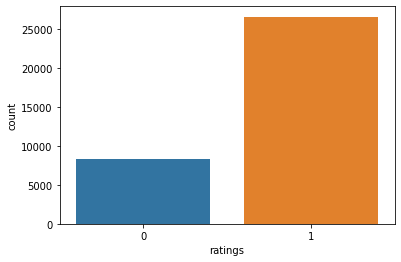

In [ ]:
sns.countplot(x='ratings', data=df)
print(df['ratings'].value_counts())

Sau khi visualize dữ liệu thì ta thấy dữ liệu bị imbalance, em sẽ xử lý trường hợp imbalance này ở gần cuối để có thể có cái nhìn tổng quát hơn trong việc so sánh kết quả giữa việc không xử lý imbalance và xử lý imbalance 

###3.3 Tiền xử lý dữ liệu

* Dữ liệu bình luận (văn nói) nên người dùng thường không quan 
tâm đến chữ hoa thường khi gõ, đưa hết về lowercase.
* Loại bỏ những ký tự kéo dài: Ví dụ: Món này ngon quáaaaaaaa--> Món này ngon quá.
* Tiếng Việt có 2 cách bỏ dấu nên đưa về 1 chuẩn. Ví dụ, chữ "Hòa" và "Hoà" đều được chấp nhận trong tiếng Việt. Ngoài ra còn một số trường hợp lỗi font chữ cũng cần chuẩn hóa lại. (các trường hợp dính chữ như: "Giao hàngnhanh" xử ý đc sẽ tốt hơn).
* Chuẩn hóa một số sentiment word: "okie"-->"ok", "okey"-->"ok", authentic--> "chuẩn chính hãng",vv...
* Emoji quy về 2 loại: emojs mang ý nghĩa tích cực (positive): '💯','💗' và emojs mang nghĩa tiêu cực (negative): '👎','😣'.
* Loại bỏ dấu câu (puntuations) và các ký tự nhiễu.
* Augmentation data bằng cách thêm vào các sample của chính tập train nhưng không dấu. (Bình luận không dấu khá phổ biến).



####3.3.1 Loại bỏ các ký tự lặp lại

In [ ]:
def remove_repeat_char(text):
  text = re.compile(r'(.)\1{1,}', re.IGNORECASE).sub(r'\1', str(text))
  return text

In [ ]:
input = "Món này ngon quáaaaaaaaa :)) Trà sữa thì không tệ 🧋 <3 \n. Mời các bạn ghé thăm quán tại trang web foody.com"
input = remove_repeat_char(input)
print(input)

Món này ngon quáa :) Trà sữa thì không tệ 🧋 <3 
. Mời các bạn ghé thăm quán tại trang web fody.com


####3.3.2 Chuẩn hóa về ký tự in thường

In [ ]:
def lowercase(text):
  return text.lower()

In [ ]:
input = lowercase(input)
print(lowercase(input))

món này ngon quáa :) trà sữa thì không tệ 🧋 <3 
. mời các bạn ghé thăm quán tại trang web fody.com


####3.3.3 Chuẩn hóa dấu câu và từ viết tắt trong Tiếng Việt

In [ ]:
def normalize_word(text):
  replace_list = {
        #Chuẩn hóa các kí tự kéo dài đặc biệt vd : quáaaaaa -> quá
        'íi' : 'í', 'ìi' : 'ì', 'ỉi' : 'ỉ', 'ĩi':'ĩ', 'áa':'á', 'àa' : 'à', 'ảa' : 'ả', 'ãa' : 'ã', 'âa' :'â', 'ầa' : 'ầ', 'ấa' : 'ấ', 'ẩa' : 'ẩ', 'ẫa' : 'ẫ',
        'ée' : 'é' , 'èe' : 'è', 'ẻe' : 'ẻ', 'ẽe' : 'ẽ' , 'êe' : 'ê', 'ếe' : 'ế', 'ềe' : 'ề', 'ểe' : 'ể', 'ễe' : 'ễ', 'ềê' : 'ề', 'ếê' : 'ế', 'ểê' : 'ể', 'ễê' : 'ễ',
        'ôo' : 'ô', 'ồo' : 'ồ' , 'ốo' : 'ố', 'ồo' : 'ồ' , 'ổo':'ổ', 'ỗo' : 'ỗ', 'ồô' : 'ồ', 'ốô' : 'ố', 'ổô' : 'ổ', 'ỗô' : 'ỗ',
        'ờo' : 'ờ', 'ớo' :'ớ', 'ởo' : 'ở', 'ỡo' : 'ỡ', 'ờơ' : 'ờ', 'ớơ' : 'ớ', 'ởơ' : 'ở', 'ỡơ' : 'ỡ',
        'ùu' :'ù', 'úu' : 'ú', 'ủu' :'ủ', 'ũu' : 'ũ', 'ừư' : 'ừ', 'ứư' : 'ứ', 'ửư' : 'ử', 'ữư' : 'ữ',
        'ýy' :'ý', 'ỳy' : 'ỳ', 'ỷy' : 'ỷ', 'ỹy' : 'ỹ',
        #Chuẩn hóa các vị trí của dấu câu
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": " negative ", "👻": " positive ", "💃": " positive ",'🤙': ' positive ', '👍': ' positive ', '🥰' : " positive ", "=)" : ' positive ',
        "💄": " positive ", "💎": " positive ", "💩": " positive ","😕": " negative ", "😱": " negative ", "😸": " positive ",
        "😾": " negative ", "🚫": " negative ",  "🤬": " negative ","🧚": " positive ", "🧡": " positive ",'🐶': ' positive ',
        '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ', '😅' : ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ', '^^' : ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' negative ', '😀': ' positive ', ':(': ' negative ', '😡': ' negative ', '😠': ' negative ',
        '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=)': '  positive ', '😋': ' positive ', ':-)' : ' positive ', ':)': '  positive ', ':>': ' positive ', ':-]' : ' positive ' ,
        '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
        '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
        '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ',
        #Chuẩn hóa 1 số sentiment words/English words
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ', 'okela' : ' ok ', 
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': ' star ', '*': ' star ', '🌟': ' star ', '🎉': u' positive ', 'great' : u' tuyệt ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ', 'khôg' : u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ', 'hí hí': ' positive ', 'ha ha':' positive ','hi hi' : 'positive',
        ' lol ': ' negative ',' cc ': ' negative ', ' đm ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ', 
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ', 'chil' : ' thư giản ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': ' hoàn hảo ', 'bad': ' tệ ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ', 'ord' : ' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ', 
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ','qủa' : u' quả ' ,u'quả ng ':u' quảng ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', '&' : ' và ', 'cool' : u' tuyệt ', 'tsua' : ' trà sữa ', 'mn' : ' mọi người ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', 'bil' : u' hóa đơn ', 'awesome' : ' tuyệt vời ', 
        ' por ': u' tệ ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ', 'awful' : u' tệ ', 'hssv' : ' học sinh sinh viên ', 'cofe' : ' cà phê '
        }

  for k, v in replace_list.items():
    text = text.replace(k, v)
  return text

In [ ]:
input = normalize_word(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
. mời các bạn ghé thăm quán tại trang web fody.com


####3.3.4 Loại bỏ các ký tự trong HTML

In [ ]:
def remove_html(text):
  HTML_TAGS = p = re.compile(r'<.*?>')
  text = HTML_TAGS.sub("", text)
  return text

In [ ]:
input = remove_html(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
. mời các bạn ghé thăm quán tại trang web fody.com


####3.3.5 Loại bỏ các punctuations

In [ ]:
def remove_punctuation(text):
  remove_punc = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  text = text.translate(remove_punc)
  return text

In [ ]:
input = remove_punctuation(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
  mời các bạn ghé thăm quán tại trang web fody com


####3.3.6 Loại bỏ các emoji không cần thiết

In [ ]:

def remove_emoji(text):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  return text

In [ ]:
input = remove_emoji(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ   positive  
  mời các bạn ghé thăm quán tại trang web fody com


In [ ]:
def no_accent(s):
    s = re.sub(r'[àáạảãâầấậẩẫăằắặẳẵ]', 'a', s)
    s = re.sub(r'[ÀÁẠẢÃĂẰẮẶẲẴÂẦẤẬẨẪ]', 'A', s)
    s = re.sub(r'[èéẹẻẽêềếệểễ]', 'e', s)
    s = re.sub(r'[ÈÉẸẺẼÊỀẾỆỂỄ]', 'E', s)
    s = re.sub(r'[òóọỏõôồốộổỗơờớợởỡ]', 'o', s)
    s = re.sub(r'[ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠ]', 'O', s)
    s = re.sub(r'[ìíịỉĩ]', 'i', s)
    s = re.sub(r'[ÌÍỊỈĨ]', 'I', s)
    s = re.sub(r'[ùúụủũưừứựửữ]', 'u', s)
    s = re.sub(r'[ƯỪỨỰỬỮÙÚỤỦŨ]', 'U', s)
    s = re.sub(r'[ỳýỵỷỹ]', 'y', s)
    s = re.sub(r'[ỲÝỴỶỸ]', 'Y', s)
    s = re.sub(r'[Đ]', 'D', s)
    s = re.sub(r'[đ]', 'd', s)
    return s


####3.3.7 Tách từ

In [ ]:
def word_segmentation(text):
  text = word_tokenize(text, format="text")
  return text

In [ ]:
input = word_segmentation(input)
print(input)

món này ngon quá positive trà sữa thì không tệ positive mời các bạn ghé thăm quán tại trang_web fody com


In [ ]:
# -*- coding: utf-8 -*-


def normalize_text(text):
      
    #Remove các ký tự kéo dài: vd: đẹppppppp
    text = remove_repeat_char(text)
    
    #lowercase the text
    text = lowercase(text)

    #normalize word
    text = normalize_word(text)
    

    #remove HTML_tags
    text = remove_html(text)

    # remove extra spaces between words
    text = " ".join(text.split()) 
    
    #remove punctuations
    text = remove_punctuation(text)
  
    # remove unwanted emojis
    text = remove_emoji(text)

    #word segmentation   
    text = word_segmentation(text)
    return text

In [ ]:
def transform_to_dataset(x_set, y_set):
  X, y = [], []
  for comment, rating in zip(x_set, y_set):
      comment = normalize_text(comment)
      X.append(comment)
      y.append(rating)
      #Augmentation bằng cách remove dấu tiếng Việt
      X.append(no_accent(comment))
      y.append(rating)
  return X, y

## Đúc trích đặc trưng (Feature engineering)


###4.1 Chia dữ liệu thành train, validation và test

Chia dữ liệu thành 2 tập **train : validation = 0.7 : 0.3**




In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df.comments, df.ratings, test_size=0.3,random_state=42)
X_train, y_train = transform_to_dataset(X_train, y_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val, y_val = transform_to_dataset(X_val, y_val)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
print(X_train.shape)
print(X_train[0:10])
print(X_val.shape)
print(X_val[0:10])

(48978,)
['gọi trên now về ăn ngon thực_sự một bát đầy ụ ăn no căng luôn có dịp sẽ ra quán nhiều nhiều positive positive'
 'goi tren now ve an ngon thuc_su mot bat day u an no cang luon co dip se ra quan nhieu nhieu positive positive'
 'ăn đây 5 6 lần rồi thì túm lại là steak ngon so với giá lần trước ăn burger không ngon miếng thịt ba_chỉ bên trong lạnh_ngắt như mới lôi ở tủ_lạnh ra nói_chung ăn bỏ nửa cái nước ép dứa cà_rốt không bỏ thêm đường uống là vừa vì dứa ngọt sẵn rồi đi ăn một_mình nên cũng không quan_tâm là không_gian kín hay mở ồn hay yên_tĩnh được cái gần phòng gym rạp chiếu_phim tiện cho việc đi tập ăn xem phim'
 'an day 5 6 lan roi thi tum lai la steak ngon so voi gia lan truoc an burger khong ngon mieng thit ba_chi ben trong lanh_ngat nhu moi loi o tu_lanh ra noi_chung an bo nua cai nuoc ep dua ca_rot khong bo them duong uong la vua vi dua ngot san roi di an mot_minh nen cung khong quan_tam la khong_gian kin hay mo on hay yen_tinh duoc cai gan phong gym rap chieu_phim t

###4.2 **TF-IDF**

In [ ]:
tfidf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000)
tfidf.fit(X_train)
print("Size of the vocabulary: " + str(len(tfidf.vocabulary_)))
vector_train = tfidf.transform(X_train)
vector_val = tfidf.transform(X_val)
print("print 10 words from the vocabulary")
vocab = {k: tfidf.vocabulary_[k] for k in list(tfidf.vocabulary_)[:10]}
print(vocab)

rr = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
print(dict(zip(tfidf.get_feature_names()[:10], tfidf.idf_)))

Size of the vocabulary: 3000
print 10 words from the vocabulary
{'gọi': 941, 'trên': 2483, 'now': 1778, 'về': 2717, 'ăn': 2845, 'ngon': 1620, 'thực_sự': 2365, 'một': 1551, 'bát': 259, 'đầy': 2914}
{'10': 4.028923709642425, '10h': 6.781867076986286, '10k': 4.3357838682811884, '10p': 7.003356368204469, '12': 6.356729203279417, '120k': 6.836302283541302, '12h': 7.036972979003454, '12k': 6.526147355237463, '130k': 7.3332387951466265, '14': 7.28828740728436}


####4.2.1 Lựa chọn thuật toán máy học

In [ ]:
#Try some models
classifiers = [
            MultinomialNB(),
            LogisticRegression(),
            LinearSVC(),
        ]
model = []
for classifier in classifiers:
    clf = classifier
    #print(classifier)
    model.append(clf.fit(vector_train, y_train))
    y_pred = clf.predict(vector_val)
    report = metrics.classification_report(y_val, y_pred, labels=[0, 1], digits=3)
    print(report)


              precision    recall  f1-score   support

           0      0.969     0.538     0.692      4964
           1      0.874     0.995     0.931     16028

   micro avg      0.887     0.887     0.887     20992
   macro avg      0.922     0.766     0.811     20992
weighted avg      0.897     0.887     0.874     20992



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0      0.906     0.791     0.844      4964
           1      0.938     0.975     0.956     16028

   micro avg      0.931     0.931     0.931     20992
   macro avg      0.922     0.883     0.900     20992
weighted avg      0.930     0.931     0.929     20992

              precision    recall  f1-score   support

           0      0.876     0.807     0.840      4964
           1      0.942     0.965     0.953     16028

   micro avg      0.927     0.927     0.927     20992
   macro avg      0.909     0.886     0.897     20992
weighted avg      0.926     0.927     0.926     20992



####4.2.2 Hyperparameter tuning

##### Naive Bayes

In [ ]:
nb_training_accuracy = []
nb_val_accuracy = []

alpha = np.arange(0.01, 500.01, 10)

for alpha_ in alpha:
  nb = MultinomialNB(alpha=alpha_).fit(vector_train, y_train)

  # Record
  nb_training_accuracy.append(nb.score(vector_train, y_train))
  nb_val_accuracy.append(nb.score(vector_val, y_val))

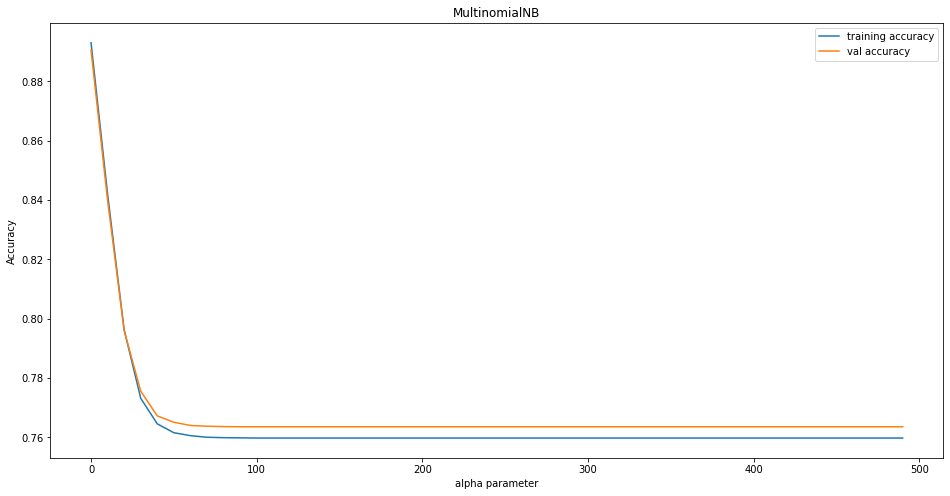

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))

ax.plot(alpha, nb_training_accuracy, label="training accuracy")
ax.plot(alpha, nb_val_accuracy, label="val accuracy")
ax.set_title("MultinomialNB")
ax.set_ylabel("Accuracy")
ax.set_xlabel("alpha parameter")
ax.legend()


In [ ]:
alpha = np.arange(0, 100, 20)
# define grid search
grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(vector_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.888678 using {'alpha': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
model[0] = MultinomialNB(alpha=0).fit(vector_train, y_train)
report = metrics.classification_report(y_val, model[0].predict(vector_val), labels=[0, 1], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.969     0.550     0.702      4964
           1      0.877     0.995     0.932     16028

   micro avg      0.889     0.889     0.889     20992
   macro avg      0.923     0.772     0.817     20992
weighted avg      0.899     0.889     0.878     20992



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


##### Logistic Regression

In [ ]:
lr_training_accuracy = []
lr_val_accuracy = []

C = np.arange(0.01, 500.001, 10)

for C_ in C:
  lr = LogisticRegression(C=C_).fit(vector_train, y_train)

  # Record
  lr_training_accuracy.append(lr.score(vector_train, y_train))
  lr_val_accuracy.append(lr.score(vector_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


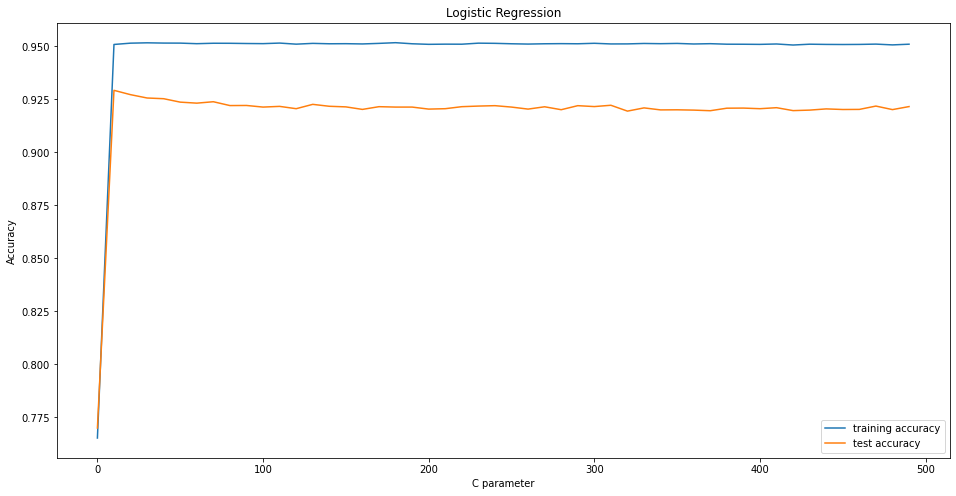

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))

ax.plot(C, lr_training_accuracy, label="training accuracy")
ax.plot(C, lr_val_accuracy, label="test accuracy")
ax.set_title("Logistic Regression")
ax.set_ylabel("Accuracy")
ax.set_xlabel("C parameter")
ax.legend()


In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = np.arange(10, 50, 10)
# define grid search
grid = dict(solver=solvers,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(vector_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.933678 using {'C': 10, 'solver': 'newton-cg'}


In [ ]:
model[1] = LogisticRegression(C=10, solver='newton-cg').fit(vector_train, y_train)
report = metrics.classification_report(y_val, model[1].predict(vector_val), labels=[0, 1], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.871     0.808     0.838      4964
           1      0.942     0.963     0.952     16028

   micro avg      0.926     0.926     0.926     20992
   macro avg      0.906     0.885     0.895     20992
weighted avg      0.925     0.926     0.925     20992



##### LinearSVC

In [ ]:
liSVC_training_accuracy = []
liSVC_val_accuracy = []

C = np.arange(0.01, 500.001, 10)

for C_ in C:
  liSVC = LinearSVC(C=C_).fit(vector_train, y_train)

  # Record
  liSVC_training_accuracy.append(liSVC.score(vector_train, y_train))
  liSVC_val_accuracy.append(liSVC.score(vector_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


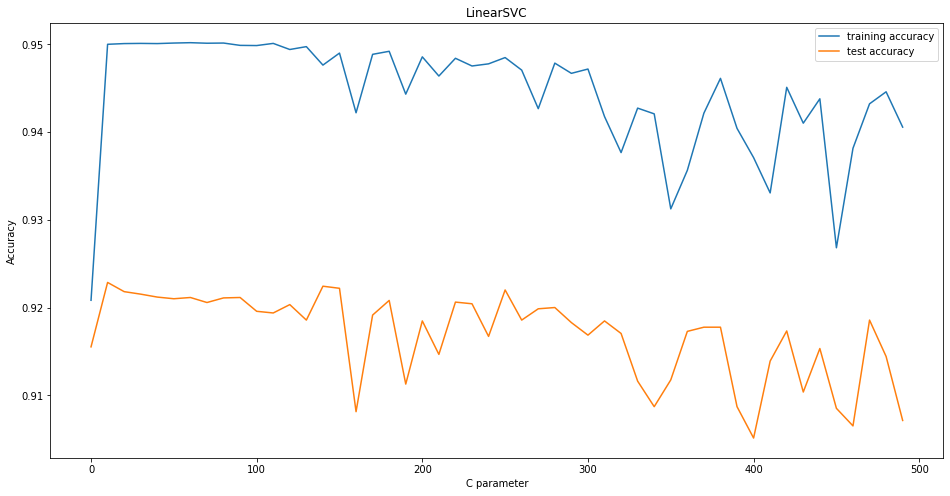

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))

ax.plot(C, liSVC_training_accuracy, label="training accuracy")
ax.plot(C, liSVC_val_accuracy, label="test accuracy")
ax.set_title("LinearSVC")
ax.set_ylabel("Accuracy")
ax.set_xlabel("C parameter")
ax.legend()


In [ ]:

multi_classes = ['ovr', 'crammer_singer']
c_values = np.arange(0, 30, 10)
# define grid search
grid = dict(C=c_values, multi_class=multi_classes)
grid_search = GridSearchCV(estimator=LinearSVC(), param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(vector_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.929234 using {'C': 10, 'multi_class': 'crammer_singer'}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
model[2] = LinearSVC(C=1, multi_class='crammer_singer').fit(vector_train, y_train)
report = metrics.classification_report(y_val, model[2].predict(vector_val), labels=[0, 1], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.884     0.809     0.845      4964
           1      0.942     0.967     0.955     16028

   micro avg      0.930     0.930     0.930     20992
   macro avg      0.913     0.888     0.900     20992
weighted avg      0.929     0.930     0.929     20992



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


####4.2.3 Load tập test và tiền xử lý


In [ ]:
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sentiment_analysis/quangnam.csv")
test_df.drop(["web-scraper-order", "web-scraper-start-url", "links", "links-href"], axis = 1, inplace=True)
print(test_df)

                                               comments  ratings
0     Quán Cao Lầu này nằm gần khách sạn mà mình ở t...      9.6
1     Trưa đấy lang thang khắp Hội An tìm cái ăn thì...      8.2
2     Ghé quán khi đang lang thang dạo quanh phố cổ,...      7.8
3     Chạy xe 25p từ nhà quán ốc.  đường xá xa xôi +...      5.0
4     Quán này vào buổi tối tầm 7h trở đi là rất đôn...      7.4
...                                                 ...      ...
4112  Nhân viên chắc bận quá nên mình thấy hơi lạnh ...      6.8
4113  Chưa bao giờ hết yêu việc đi Hội An lùng những...      7.8
4114  Cơm ngon. Nước sốt tuyệt vời luôn. Thịt thì mh...      8.8
4115  Mình ghé đến đây vào buổi chiều khá nắng! Mng ...      8.4
4116  Ăn mì quán này lâu rồi nhung hôm nay mới thấy ...     10.0

[4117 rows x 2 columns]


In [ ]:
test_df = test_df[((test_df["ratings"] <= 5.0) | (test_df["ratings"] >= 8.0))] # remove the neutral comments (5 < x < 8)
test_df.loc[test_df["ratings"] <= 5.0, "ratings"] = 0
test_df.loc[test_df["ratings"] >= 8.0, "ratings"] = 1
test_df["ratings"] = test_df["ratings"].astype(int)

test_df.reset_index(inplace=True)
test_df = test_df.drop("index", axis= 1)
print(test_df)

                                               comments  ratings
0     Quán Cao Lầu này nằm gần khách sạn mà mình ở t...        1
1     Trưa đấy lang thang khắp Hội An tìm cái ăn thì...        1
2     Chạy xe 25p từ nhà quán ốc.  đường xá xa xôi +...        0
3     Hôm nay vô Hội An chơi, ghé quán Bim Bim 17...        1
4     Lướt trên foody và tìm thấy quán này mua bánh ...        1
...                                                 ...      ...
2394  Quá thích hợp cho những chiều cuối tuần cần th...        1
2395  Không gian măt mẻ, trưa nắng nóng vào quán như...        1
2396  Cơm ngon. Nước sốt tuyệt vời luôn. Thịt thì mh...        1
2397  Mình ghé đến đây vào buổi chiều khá nắng! Mng ...        1
2398  Ăn mì quán này lâu rồi nhung hôm nay mới thấy ...        1

[2399 rows x 2 columns]


1    1899
0     500
Name: ratings, dtype: int64


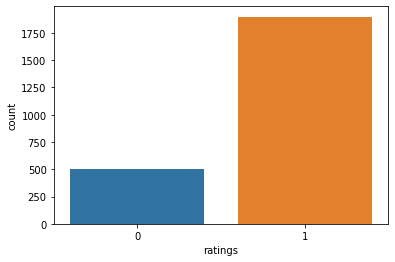

In [ ]:
sns.countplot(x='ratings', data=test_df)
print(test_df['ratings'].value_counts())

####4.2.4 Đánh giá các thuật toán dựa trên tập test

In [ ]:
X_test, y_test = transform_to_dataset(test_df.comments, test_df.ratings)

In [ ]:
vector_test = tfidf.transform(X_test)

In [ ]:
for i in range (0, len(model)):
  y_pred = model[i].predict(vector_test)
  report = metrics.classification_report(y_test, y_pred, labels=[0, 1], digits=3)
  print(report)

              precision    recall  f1-score   support

           0      0.986     0.500     0.664      1000
           1      0.883     0.998     0.937      3798

   micro avg      0.894     0.894     0.894      4798
   macro avg      0.935     0.749     0.800      4798
weighted avg      0.905     0.894     0.880      4798

              precision    recall  f1-score   support

           0      0.919     0.789     0.849      1000
           1      0.946     0.982     0.964      3798

   micro avg      0.941     0.941     0.941      4798
   macro avg      0.932     0.885     0.906      4798
weighted avg      0.941     0.941     0.940      4798

              precision    recall  f1-score   support

           0      0.876     0.805     0.839      1000
           1      0.950     0.970     0.960      3798

   micro avg      0.936     0.936     0.936      4798
   macro avg      0.913     0.887     0.899      4798
weighted avg      0.934     0.936     0.935      4798



####4.2.5 Lưu model tốt nhất

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis/best_model.sav'
pickle.dump(model[1], open(filename, 'wb'))

###4.3 **Word Embeddings**

####4.3.1 Khảo sát tập dữ liệu huấn luyện

Do khối lượng dữ liệu lớn (34985 mẫu), nếu chúng ta chọn số lượng từ tối đa cho một câu (MAX_SEQ_LENGTH) quá cao thì sẽ bị lãng phí khi biểu diễn ở những câu review quá ngắn. Ngược lại, nếu sử dụng số lượng từ tối đa quá ít thì sẽ bị bỏ lỡ những từ quan trọng giúp cho việc phân tích cảm xúc. Sau đây chúng ta sẽ tiến hành khảo sát độ dài của các mẫu dữ liệu huấn luyện.

In [ ]:
#find maximum number of words in a sentence
num_words = [len(x.split()) for x in list(X_train)]
print('The total number of samples is', len(X_train))
print('The total number of words in the files is', sum(num_words))
print('The average number of words in the files is', sum(num_words)/len(num_words))

The total number of samples is 48978
The total number of words in the files is 3783702
The average number of words in the files is 77.25309322552982


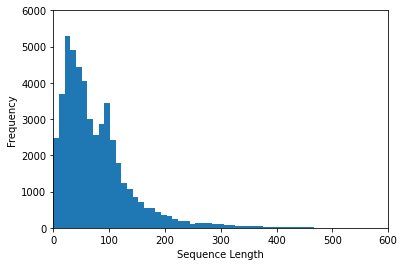

In [ ]:
%matplotlib inline
plt.hist(num_words, 100)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 600, 0, 6000])
plt.show()

####4.3.2 Khởi tạo các tham số

In [ ]:
vocab_size = 10000
embedding_dim = 100
max_length = 250

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
print(train_padded)
print(train_padded.shape)

[[114 312 522 ...   0   0   0]
 [ 95 306 522 ...   0   0   0]
 [  4  41 360 ...   0   0   0]
 ...
 [258  36  42 ...   0   0   0]
 [504 494 308 ...   0   0   0]
 [421 464 282 ...   0   0   0]]
(48978, 250)


In [ ]:
val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating='post', padding='post')
print(val_padded)
print(val_padded.shape)

[[ 15  44 920 ...   0   0   0]
 [ 13  42 879 ...   0   0   0]
 [248 607 106 ...   0   0   0]
 ...
 [350 119   3 ...   0   0   0]
 [ 96 220   6 ...   0   0   0]
 [ 47  86   5 ...   0   0   0]]
(20992, 250)


####4.3.3 Xây dựng mô hình

In [ ]:
model_dl = tf.keras.Sequential()
model_dl.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model_dl.add(tf.keras.layers.Flatten())
model_dl.add(tf.keras.layers.Dense(10, activation="relu"))
model_dl.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_dl.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 25000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                250010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,250,021
Trainable params: 1,250,021
Non-trainable params: 0
_________________________________________________________________


####4.3.4 Huấn luyện mô hình

Epoch 1/40
1531/1531 [==============================] - 21s 13ms/step - loss: 0.2416 - accuracy: 0.9081 - val_loss: 0.2241 - val_accuracy: 0.9226
Epoch 2/40
1531/1531 [==============================] - 21s 13ms/step - loss: 0.0894 - accuracy: 0.9699 - val_loss: 0.3206 - val_accuracy: 0.9115
Epoch 3/40
1531/1531 [==============================] - 21s 13ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.4581 - val_accuracy: 0.9051
Epoch 4/40
1531/1531 [==============================] - 21s 14ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.5291 - val_accuracy: 0.8972
Epoch 5/40
1531/1531 [==============================] - 21s 13ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.6783 - val_accuracy: 0.9000
Epoch 6/40
1531/1531 [==============================] - 20s 13ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.7678 - val_accuracy: 0.8988
Epoch 7/40
1531/1531 [==============================] - 21s 13ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.7539 -

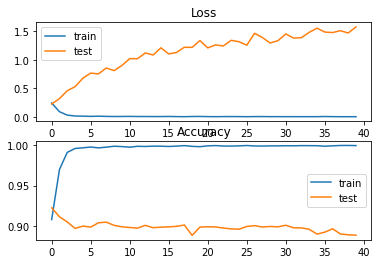

In [ ]:
num_epochs = 40
history = model_dl.fit(train_padded, y_train, epochs=num_epochs, validation_data=(val_padded, y_val))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

####4.3.5 Đánh giá mô hình trên tập test

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
print(test_padded)
print(test_padded.shape)

[[  15  324 1576 ...    0    0    0]
 [  13  324  134 ...    0    0    0]
 [ 664  667  799 ...    0    0    0]
 ...
 [   5  239   73 ...    0    0    0]
 [   4  279   15 ...    0    0    0]
 [   3  266   13 ...    0    0    0]]
(4798, 250)


In [ ]:
test_pred = model.predict(test_padded)
for i in range (0, len(test_pred)):
  if float(test_pred[i]) >= 0.5:
    test_pred[i] = 1
  else :
    test_pred[i] = 0
report = metrics.classification_report(y_test, test_pred, labels=[0,1], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.752     0.718     0.735      1000
           1      0.927     0.938     0.932      3798

   micro avg      0.892     0.892     0.892      4798
   macro avg      0.839     0.828     0.833      4798
weighted avg      0.890     0.892     0.891      4798



In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for i in range(1, vocab_size):
  word = tokenizer.index_word[i]
  vector = weights[i]
  out_m.write(word + "\n")
  out_v.write("\t".join([str(x) for x in vector ]) + "\n")

out_m.close()
out_v.close()


## **Xử lý dữ liệu mất cân bằng**
Có một hướng tiếp cận được gọi là ‘**Resampling**’ để hai classes có lượng dữ liệu tương đối như nhau. 
1. Cách thứ nhất là **UNDER-sampling**, tức chỉ chọn ra vài phần tử của class trội hơn và kết hợp với class còn lại để làm dữ liệu training. 

2. Cách thứ hai là **OVER-sampling**, tức có thể lặp lại dữ liệu, hoặc tìm cách kết hợp để tạo ra dữ liệu mới, của class ít hơn, và kết hợp với class còn lại để làm dữ liệu training.

### **Undersampling**

Kiểm tra số lượng của tập nhỏ hơn

In [ ]:
minority_class_len = len(df[df["ratings"] == 0])
print(minority_class_len)

8366


In [ ]:
majority_class_indices = df[df["ratings"] == 1].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            34973, 34974, 34975, 34976, 34977, 34978, 34979, 34980, 34981,
            34982],
           dtype='int64', length=26619)


Chọn ngẫu nhiên các bình luận trong tập lớn với số lượng bằng với số lượng tập nhỏ 

In [ ]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

8366


In [ ]:
minority_class_indices = df[df["ratings"] == 0].index
print(minority_class_indices)

Int64Index([    8,    12,    13,    14,    16,    19,    29,    33,    49,
               66,
            ...
            34955, 34956, 34958, 34960, 34961, 34967, 34971, 34972, 34983,
            34984],
           dtype='int64', length=8366)


Kết hợp 2 tập lớn mới mà tập nhỏ ta có được 1 dataset cân bằng hơn dataset cũ. Từ đó, ta chạy lại các thuật toán máy học để đánh giá kết quả

In [ ]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
under_sample = df.loc[under_sample_indices]
print(under_sample)


                                               comments  ratings
8     Đã tới ăn , vị ổn , nhưng mình tưởng như hình ...        0
12    Bánh tráng cuộn thịt heo quá mắc, giá bán 63k ...        0
13    Mình chỉ order về 2 món: nộm bò với mì quảng -...        0
14      Book foody , quán đóng gói sạch sẽ, ăn khá ngon        0
16    Quán ăn ngon, phục vụ tốt, sạch sẽ. Decor quán...        0
...                                                 ...      ...
8114  .Dành cho ai muốn đi tìm hương vị bình dị của ...        1
9547  Mình đến gọi thử thức uống mới là Mango Mango,...        1
192   Bánh ngon xuất sắc, vỏ bánh mỏng mềm và dai, l...        1
9966  Vào mì cay sasin mà không ăn mì cay vì mình kh...        1
8693  Hôm nay order cả hai phần vì đói quá. Bữa nào ...        1

[16732 rows x 2 columns]


1    8366
0    8366
Name: ratings, dtype: int64


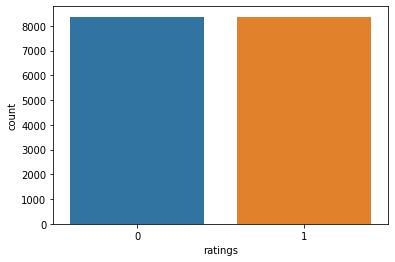

In [ ]:
sns.countplot(x='ratings', data=under_sample)
print(under_sample['ratings'].value_counts())

In [ ]:
undersampling_X_train, undersampling_X_val, undersampling_y_train, undersampling_y_val = train_test_split(under_sample["comments"], under_sample["ratings"], test_size=0.3, random_state=42)
undersampling_X_train, undersampling_y_train = transform_to_dataset(undersampling_X_train, undersampling_y_train)
undersampling_X_val, undersampling_y_val = transform_to_dataset(undersampling_X_val, undersampling_y_val)

In [ ]:
undersampling_X_train = np.array(undersampling_X_train)
undersampling_y_train = np.array(undersampling_y_train)
undersampling_X_val = np.array(undersampling_X_val)
undersampling_y_val = np.array(undersampling_y_val)

#### Tfidf

In [ ]:
tf_undersampling = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tf_undersampling.fit(undersampling_X_train)
print(len(tf_undersampling.vocabulary_))
undersampling_vector_train = tf_undersampling.transform(undersampling_X_train)
undersampling_vector_val = tf_undersampling.transform(undersampling_X_val)

print (tf_undersampling.vocabulary_)
print (tf_undersampling.idf_)

3000
{'hôm_nay': 1080, 'vừa': 2731, 'lúc': 1371, 'đang': 2854, 'có': 610, 'mã': 1512, 'code': 553, '50k': 64, 'cho': 426, 'đơn': 2898, 'đặt_hàng': 2930, 'qua': 1941, 'nên': 1807, 'gọi': 954, 'luôn': 1348, 'ding': 742, 'tea': 2202, 'chùa': 483, 'láng': 1360, 'positive': 1936, 'giao': 888, 'hàng': 1065, 'trường': 2492, 'mình': 1517, 'mất': 1532, 'phí': 1913, '5k': 67, 'thôi': 2317, 'trà': 2475, 'xanh': 2746, 'mà': 1504, 'bù': 288, 'thêm': 2312, 'quá': 1962, 'lời': 1410, 'khá': 1201, 'ok': 1856, 'rất': 2038, 'thơm': 2321, 'thì': 2313, 'thật_sự': 2338, 'ngon': 1622, 'dai': 686, 'dẻo': 817, 'cốc': 659, 'cỡ': 664, 'uống': 2633, 'no': 1764, 'lắm': 1398, 'vị_trí': 2720, 'từ': 2614, 'thanh': 2221, 'đi': 2858, 'vào': 2692, 'khoảng': 1186, 'bên': 277, 'nhân_viên': 1721, 'đồ': 2950, 'hơi': 1085, 'bị': 323, 'sớm': 2165, 'thành': 2304, 'ra': 1977, 'học': 1109, 'cứ': 669, 'phải': 1921, 'để': 2939, 'bạn': 302, 'đợi': 2967, '10p': 4, 'hom_nay': 1030, 'vua': 2675, 'luc': 1335, 'dang': 692, 'co': 540, 'm

In [ ]:
#Try some models
classifiers = [
            MultinomialNB(),
            LogisticRegression(),
            LinearSVC(),
        ]
model_undersampling = []
for classifier in classifiers:
    clf = classifier
    model_undersampling.append(clf.fit(undersampling_vector_train, undersampling_y_train))
    undersampling_y_pred = clf.predict(undersampling_vector_val)
    report = metrics.classification_report(undersampling_y_val, undersampling_y_pred, labels=[0,1], digits=3)
    print(report)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0      0.914     0.854     0.883      5106
           1      0.859     0.916     0.887      4934

   micro avg      0.885     0.885     0.885     10040
   macro avg      0.886     0.885     0.885     10040
weighted avg      0.887     0.885     0.885     10040

              precision    recall  f1-score   support

           0      0.903     0.881     0.892      5106
           1      0.880     0.902     0.891      4934

   micro avg      0.891     0.891     0.891     10040
   macro avg      0.891     0.891     0.891     10040
weighted avg      0.891     0.891     0.891     10040

              precision    recall  f1-score   support

           0      0.881     0.869     0.875      5106
           1      0.866     0.878     0.872      4934

   micro avg      0.873     0.873     0.873     10040
   macro avg      0.873     0.873     0.873     10040
weighted avg      0.873     0.873     0.873     10040



dùng tham số tuning ở trên

In [ ]:
#Try some models
classifiers = [
            MultinomialNB(alpha=0),
            LogisticRegression(C=10, solver='newton-cg'),
            LinearSVC(C=10, multi_class='crammer_singer'),
        ]
model_undersampling = []
for classifier in classifiers:
    clf = classifier
    model_undersampling.append(clf.fit(undersampling_vector_train, undersampling_y_train))
    undersampling_y_pred = clf.predict(undersampling_vector_val)
    report = metrics.classification_report(undersampling_y_val, undersampling_y_pred, labels=[0,1], digits=3)
    print(report)


              precision    recall  f1-score   support

           0      0.913     0.857     0.884      5106
           1      0.861     0.916     0.888      4934

   micro avg      0.886     0.886     0.886     10040
   macro avg      0.887     0.887     0.886     10040
weighted avg      0.888     0.886     0.886     10040



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0      0.918     0.887     0.902      5106
           1      0.887     0.919     0.903      4934

   micro avg      0.902     0.902     0.902     10040
   macro avg      0.903     0.903     0.902     10040
weighted avg      0.903     0.902     0.902     10040

              precision    recall  f1-score   support

           0      0.903     0.878     0.890      5106
           1      0.877     0.902     0.889      4934

   micro avg      0.890     0.890     0.890     10040
   macro avg      0.890     0.890     0.890     10040
weighted avg      0.890     0.890     0.890     10040



#### Đánh giá trên tập test

In [ ]:
vector_test_undersampling = tf_undersampling.transform(X_test)

In [ ]:
for i in range (0, len(model_undersampling)):
  y_pred = model_undersampling[i].predict(vector_test_undersampling)
  report = metrics.classification_report(y_test, y_pred, labels=[0, 1], digits=3)
  print(report)

              precision    recall  f1-score   support

           0      0.755     0.846     0.798      1000
           1      0.958     0.928     0.943      3798

   micro avg      0.911     0.911     0.911      4798
   macro avg      0.856     0.887     0.870      4798
weighted avg      0.916     0.911     0.912      4798

              precision    recall  f1-score   support

           0      0.742     0.888     0.809      1000
           1      0.969     0.919     0.943      3798

   micro avg      0.912     0.912     0.912      4798
   macro avg      0.856     0.903     0.876      4798
weighted avg      0.922     0.912     0.915      4798

              precision    recall  f1-score   support

           0      0.721     0.883     0.794      1000
           1      0.967     0.910     0.938      3798

   micro avg      0.905     0.905     0.905      4798
   macro avg      0.844     0.897     0.866      4798
weighted avg      0.916     0.905     0.908      4798



#### Word embedding

In [ ]:
tokenizer_undersampling = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer_undersampling.fit_on_texts(undersampling_X_train)
word_index = tokenizer_undersampling.word_index
undersampling_train_sequences = tokenizer_undersampling.texts_to_sequences(undersampling_X_train)
undersampling_train_padded = pad_sequences(undersampling_train_sequences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
print(undersampling_train_padded)
print(undersampling_train_padded.shape)

[[ 257  218  654 ...    0    0    0]
 [ 194  210  151 ...    0    0    0]
 [  18   26  162 ...    0    0    0]
 ...
 [ 128  313  184 ...    0    0    0]
 [ 129  853 1498 ...    0    0    0]
 [  58  723 1415 ...    0    0    0]]
(23424, 250)


In [ ]:
undersampling_val_sequences = tokenizer_undersampling.texts_to_sequences(undersampling_X_val)
undersampling_val_padded = pad_sequences(undersampling_val_sequences, maxlen=max_length, truncating='post', padding='post')
print(undersampling_val_padded)
print(undersampling_val_padded.shape)

[[ 672  676  857 ...    0    0    0]
 [ 603  303  405 ...    0    0    0]
 [ 326  595   18 ...    0    0    0]
 ...
 [  58  107  216 ...  154    0    0]
 [  94  572 2073 ...    0    0    0]
 [  70   59  912 ...    0    0    0]]
(10040, 250)


In [ ]:
model_undersampling_dl = tf.keras.Sequential()
model_undersampling_dl.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model_undersampling_dl.add(tf.keras.layers.Flatten())
model_undersampling_dl.add(tf.keras.layers.Dense(10, activation="relu"))
model_undersampling_dl.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_undersampling_dl.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_undersampling_dl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250010    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,250,021
Trainable params: 1,250,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
732/732 [==============================] - 11s 15ms/step - loss: 0.3351 - accuracy: 0.8513 - val_loss: 0.2852 - val_accuracy: 0.8929
Epoch 2/40
732/732 [==============================] - 10s 14ms/step - loss: 0.1303 - accuracy: 0.9554 - val_loss: 0.3375 - val_accuracy: 0.8803
Epoch 3/40
732/732 [==============================] - 10s 14ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.4686 - val_accuracy: 0.8653
Epoch 4/40
732/732 [==============================] - 11s 14ms/step - loss: 0.0132 - accuracy: 0.9966 - val_loss: 0.5399 - val_accuracy: 0.8704
Epoch 5/40
732/732 [==============================] - 10s 14ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.6339 - val_accuracy: 0.8693
Epoch 6/40
732/732 [==============================] - 11s 15ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.7033 - val_accuracy: 0.8651
Epoch 7/40
732/732 [==============================] - 11s 15ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.7799 - val_accuracy:

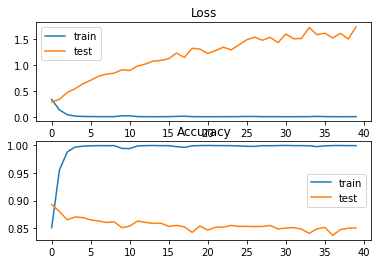

In [ ]:
num_epochs = 40
history_undersampling = model_undersampling_dl.fit(undersampling_train_padded, undersampling_y_train, epochs=num_epochs, validation_data=(undersampling_val_padded, undersampling_y_val))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history_undersampling.history['loss'], label='train')
plt.plot(history_undersampling.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_undersampling.history['accuracy'], label='train')
plt.plot(history_undersampling.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### Đánh giá trên tập test

In [ ]:
undersampling_test_sequences = tokenizer_undersampling.texts_to_sequences(X_test)
undersampling_test_padded = pad_sequences(undersampling_test_sequences, maxlen=max_length, truncating='post', padding='post')
print(undersampling_test_padded)
print(undersampling_test_padded.shape)

[[  18  332 1852 ...    0    0    0]
 [  14  332  142 ...    0    0    0]
 [ 694  588  880 ...    0    0    0]
 ...
 [   6  253   70 ...    0    0    0]
 [   5  272   18 ...    0    0    0]
 [   4  265   14 ...    0    0    0]]
(4798, 250)


In [ ]:
test_pred = model_undersampling_dl.predict(undersampling_test_padded)
for i in range (0, len(test_pred)):
  if float(test_pred[i]) >= 0.5:
    test_pred[i] = 1
  else :
    test_pred[i] = 0
report = metrics.classification_report(y_test, test_pred, labels=[0,1], digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.654     0.819     0.727      1000
           1      0.949     0.886     0.916      3798

   micro avg      0.872     0.872     0.872      4798
   macro avg      0.801     0.852     0.822      4798
weighted avg      0.887     0.872     0.877      4798



## **Deploy to the website** 

In [ ]:
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis/best_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
app = Flask(__name__, template_folder=r'/content/drive/My Drive/Colab Notebooks/sentiment_analysis')
run_with_ngrok(app)  # Start ngrok when app is run


@app.route("/")
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        data = normalize_text(data)
        data = [data]
        data = tfidf.transform(data)
        my_prediction = loaded_model.predict(data)
        
    return render_template('result.html',prediction = my_prediction)

if __name__ == '__main__':
    app.run()
